<a href="https://colab.research.google.com/github/fitocuan/CE888_2020/blob/master/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [5]:
df = pd.read_csv("/bank-additional-full.csv", delimiter=';')

print(df.head())

   age        job  marital  ... euribor3m nr.employed   y
0   56  housemaid  married  ...     4.857      5191.0  no
1   57   services  married  ...     4.857      5191.0  no
2   37   services  married  ...     4.857      5191.0  no
3   40     admin.  married  ...     4.857      5191.0  no
4   56   services  married  ...     4.857      5191.0  no

[5 rows x 21 columns]


In [11]:
df_dummies = pd.get_dummies(df)
df_dummies.drop(['y_no', 'duration'],axis=1, inplace=True)




   age  duration  campaign  ...  poutcome_success  y_no  y_yes
0   56       261         1  ...                 0     1      0
1   57       149         1  ...                 0     1      0
2   37       226         1  ...                 0     1      0
3   40       151         1  ...                 0     1      0
4   56       307         1  ...                 0     1      0

[5 rows x 65 columns]
   age  campaign  pdays  ...  poutcome_nonexistent  poutcome_success  y_yes
0   56         1    999  ...                     1                 0      0
1   57         1    999  ...                     1                 0      0
2   37         1    999  ...                     1                 0      0
3   40         1    999  ...                     1                 0      0
4   56         1    999  ...                     1                 0      0

[5 rows x 63 columns]


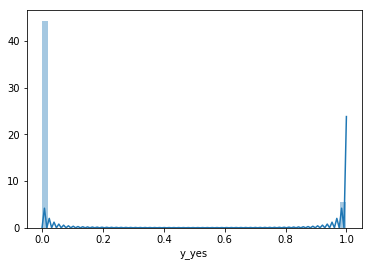

In [12]:
sns.distplot(df_dummies["y_yes"])

In [20]:
clf = ExtraTreesClassifier(n_estimators=100, max_depth=4)
X = df_dummies.drop(["y_yes"],axis = 1).copy().values
y = df_dummies["y_yes"].copy().values

clf.fit(X,y)

scores = cross_val_score(clf, X, y, cv = 10, scoring = make_scorer(mse))

print("MSE: %0.8f +/- %0.8f" % (scores.mean(), scores.std()))

MSE: 0.15252770 +/- 0.11730649


In [22]:
features = df_dummies.drop(["y_yes"],axis = 1).columns


importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]],  importances[indices[f]]))


[ 2 61  4  8  7 49 50  6  5 60 43 42  3 59 52 34 53 33 45 48  0 14 10 51
 44 17 55 46 47  1 27 23 31 57 16 22 20 56 11 58 32  9 18 39 38 54 36 25
 30 21 15 41 40 24 12 28 37 26 29 19 13 35]
Feature ranking:
1. pdays (0.168312)
2. poutcome_success (0.147991)
3. emp.var.rate (0.142035)
4. nr.employed (0.128020)
5. euribor3m (0.090459)
6. month_mar (0.039196)
7. month_may (0.034906)
8. cons.conf.idx (0.034118)
9. cons.price.idx (0.032587)
10. poutcome_nonexistent (0.031383)
11. contact_telephone (0.025181)
12. contact_cellular (0.018165)
13. previous (0.016197)
14. poutcome_failure (0.014434)
15. month_oct (0.012216)
16. default_unknown (0.008643)
17. month_sep (0.008531)
18. default_no (0.006905)
19. month_aug (0.005517)
20. month_jun (0.004049)
21. age (0.004029)
22. job_retired (0.003726)
23. job_blue-collar (0.003585)
24. month_nov (0.003402)
25. month_apr (0.003281)
26. job_student (0.002473)
27. day_of_week_mon (0.001690)
28. month_dec (0.001494)
29. month_jul (0.001404)
30. campaig

In [24]:
# Compute confusion matrix
y_pred = clf.predict(X)
cnf_matrix = confusion_matrix(y, y_pred)
np.set_printoptions(precision=2)

print(cnf_matrix)

[[36285   263]
 [ 3907   733]]
